# SEVIA Automated Visual Examination (SAVE)

#### Data preprocessing

In [78]:
import os, shutil


In [160]:
import tensorflow
print(tensorflow.__version__)

2.0.0


In [79]:
#making directories

positive_directory = "/Users/kitolinakippa/Desktop/SAVE/sevia_images_dump/positive"
negative_directory = "/Users/kitolinakippa/Desktop/SAVE/sevia_images_dump/negative"

#creating the dataset directories
dataset_directory = '/Users/kitolinakippa/Desktop/SAVE/sevia_images_dump/simulation_model_dataset_1'
try:
    os.mkdir(dataset_directory)
except FileExistsError:
    print("directory {} exists".format(dataset_directory ))


#creating the train, validation and test dataset directories
train_directory = os.path.join(dataset_directory, 'train') 
try:
    os.mkdir(train_directory)
except FileExistsError:
    print("directory {} exists".format(train_directory ))


validation_directory = os.path.join(dataset_directory, 'validation') 
try:
    os.mkdir(validation_directory)
except FileExistsError:
    print("directory {} exists".format(validation_directory ))


test_directory = os.path.join(dataset_directory, 'test')
try:
    os.mkdir(test_directory)
except FileExistsError:
    print("directory {} exists".format(test_directory ))


#positive and negative in each directory
train_positive_directory = os.path.join(train_directory, 'positive') 
try:
    os.mkdir(train_positive_directory)
except FileExistsError:
    print("directory {} exists".format(train_positive_directory ))


train_negative_directory = os.path.join(train_directory, 'negative') 
try:
    os.mkdir(train_negative_directory)
except FileExistsError:
    print("directory {} exists".format(train_negative_directory ))


validation_positive_directory = os.path.join(validation_directory, 'positive') 
try:
    os.mkdir(validation_positive_directory)
except FileExistsError:
    print("directory {} exists".format(validation_positive_directory ))


validation_negative_directory = os.path.join(validation_directory, 'negative') 

try:
    os.mkdir(validation_negative_directory)
except FileExistsError:
    print("directory {} exists".format(validation_negative_directory ))


test_positive_directory = os.path.join(test_directory, 'positive') 

try:
    os.mkdir(test_positive_directory)
except FileExistsError:
    print("directory {} exists".format(test_positive_directory ))


test_negative_directory = os.path.join(test_directory, 'negative') 
try:
    os.mkdir(test_negative_directory)
except FileExistsError:
    print("directory {} exists".format(test_negative_directory ))



In [80]:
#POSITIVE DATA
if len(os.listdir(train_positive_directory)) == 0:
    positive_train_file = ['positive_{}.png'.format(i) for i in range(2000)] 
    for image in positive_train_file:
        source = os.path.join(positive_directory, image) 
        destination = os.path.join(train_positive_directory, image) 
        shutil.copyfile(source, destination)

if len(os.listdir(validation_positive_directory)) == 0:
    positive_validation_file = ['positive_{}.png'.format(i) for i in range(2000, 2500)] 
    for image in positive_validation_file:
        source = os.path.join(positive_directory, image) 
        destination = os.path.join(validation_positive_directory, image) 
        shutil.copyfile(source, destination)

if len(os.listdir(test_positive_directory)) == 0:
    positive_test_file = ['positive_{}.png'.format(i) for i in range(2500, 3000)] 
    for image in positive_test_file:
        source = os.path.join(positive_directory, image) 
        destination = os.path.join(test_positive_directory, image) 
        shutil.copyfile(source, destination)

#NEGATIVE DATA
if len(os.listdir(train_negative_directory)) == 0:
    negative_train_file = ['negative_{}.png'.format(i) for i in range(2000)] 
    for image in negative_train_file:
        source = os.path.join(negative_directory, image) 
        destination = os.path.join(train_negative_directory, image) 
        shutil.copyfile(source, destination)

if len(os.listdir(validation_negative_directory)) == 0:
    negative_validation_file = ['negative_{}.png'.format(i) for i in range(2000, 2500)] 
    for image in negative_validation_file:
        source = os.path.join(negative_directory, image) 
        destination = os.path.join(validation_negative_directory, image) 
        shutil.copyfile(source, destination)

if len(os.listdir(test_negative_directory)) == 0:
    negative_test_file = ['negative_{}.png'.format(i) for i in range(2500, 3000)] 
    for image in negative_test_file:
        source = os.path.join(negative_directory, image) 
        destination = os.path.join(test_negative_directory, image) 
        shutil.copyfile(source, destination)

     

In [81]:
print('total training positive images:', len(os.listdir(train_positive_directory)))
print('total training negative images:', len(os.listdir(train_negative_directory)))
print('total validation positive images:', len(os.listdir(validation_positive_directory)))
print('total validation negative images:', len(os.listdir(validation_negative_directory)))
print('total test positive images:', len(os.listdir(test_positive_directory)))
print('total test negative images:', len(os.listdir(test_negative_directory)))



total training positive images: 2000
total training negative images: 2000
total validation positive images: 500
total validation negative images: 500
total test positive images: 500
total test negative images: 500


In [82]:
#rescaling
from keras.preprocessing.image import ImageDataGenerator

train_rescale = ImageDataGenerator(rescale=1./255)
validation_rescale = ImageDataGenerator(rescale=1./255)


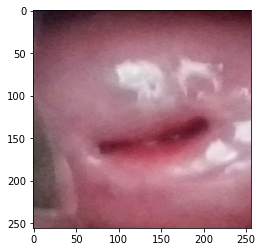

batch shape: (1, 256, 256, 3)


In [157]:
#review one preprocessed image
from keras.preprocessing import image
import matplotlib.pyplot as plt

positive_file = [os.path.join(train_positive_directory, data) 
          for data in os.listdir(train_positive_directory)]

path = positive_file[0]

img = image.load_img(path, target_size=(256, 256))

array_image = image.img_to_array(img)

array_image = array_image.reshape((1,) + array_image.shape)


i=0
for batch in train_rescale.flow(array_image, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0])) 
    break 
    
plt.show()

scaled_image = train_rescale.flow(array_image, batch_size=1)
for batch in scaled_image:
    print('batch shape:',batch.shape)
    break


In [ ]:
### work with all data
preprocessed_train_data = train_rescale.flow_from_directory(train_directory, target_size =(256, 256),
                                                   batch_size=32, class_mode='binary')

preprocessed_validation_data = validation_rescale.flow_from_directory(validation_directory, target_size=(256,256),
                                                       batch_size=32, class_mode='binary')

for data_batch, labels_batch in preprocessed_validation_data:
    print('data batch shape:', data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break


#### Model creation(simulation)

In [85]:
#creating a model
from keras import layers
from keras import models

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Dropout(0.5)) 
model.add(layers.Flatten()) 
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_66 (MaxPooling (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 28, 28, 128)     

In [86]:
#setting loss function, optimizer and metrics
from keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(),
              metrics=['acc'])


In [100]:
#fitting the model
history = model.fit(preprocessed_train_data,
                    steps_per_epoch = 125,
                    epochs = 10,
                    validation_data= preprocessed_validation_data,
                    validation_steps=100)

Epoch 1/10
125/125 [==============================] - 1054s 8s/step - loss: 0.5594 - acc: 0.7225 - val_loss: 0.5052 - val_acc: 0.7184
Epoch 2/10
125/125 [==============================] - 1321s 11s/step - loss: 0.5244 - acc: 0.7540 - val_loss: 0.6655 - val_acc: 0.7788
Epoch 3/10
125/125 [==============================] - 5598s 45s/step - loss: 0.4987 - acc: 0.7795 - val_loss: 0.4411 - val_acc: 0.7999
Epoch 4/10
125/125 [==============================] - 1786s 14s/step - loss: 0.4731 - acc: 0.7918 - val_loss: 0.3471 - val_acc: 0.7842
Epoch 5/10
125/125 [==============================] - 1937s 15s/step - loss: 0.4571 - acc: 0.8043 - val_loss: 0.4206 - val_acc: 0.7730
Epoch 6/10
125/125 [==============================] - 1831s 15s/step - loss: 0.4346 - acc: 0.8167 - val_loss: 0.4658 - val_acc: 0.8149
Epoch 7/10
125/125 [==============================] - 1300s 10s/step - loss: 0.4180 - acc: 0.8155 - val_loss: 0.2858 - val_acc: 0.8146
Epoch 8/10
125/125 [==============================] - 10

In [98]:
#checking the corrupted image
import os
from PIL import Image
folder_path = validation_directory
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [103]:
#saving the model
model.save('SAVE_model_1.h5')

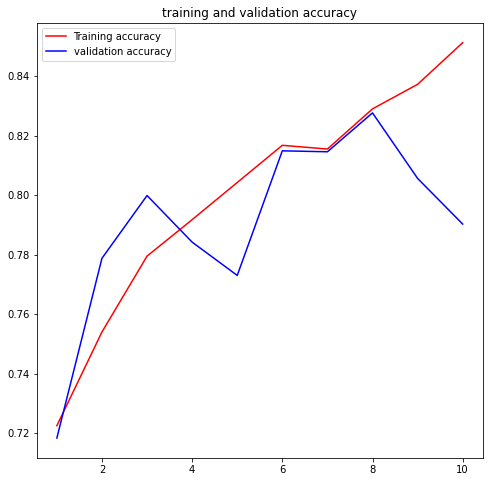

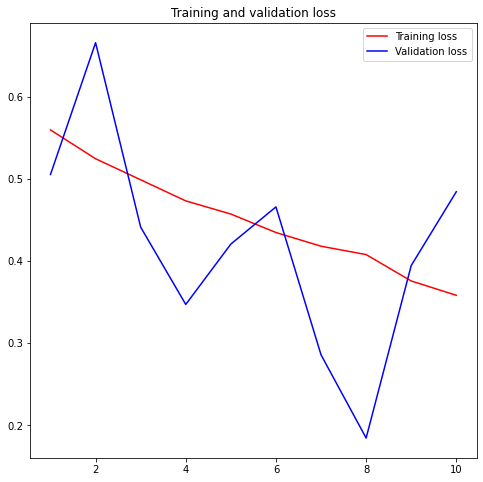

In [132]:
#visualizing the model
#display curves of loss and accuracy during training

import matplotlib.pyplot as plt
import numpy as np

accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)
#x = range(1, 20, 4 )
#y = np.arange(0.71, 1.0)


plt.figure(figsize=(8.0, 8.0))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label = 'validation accuracy')
#plt.yticks(y)
#plt.xticks(x)
plt.title('training and validation accuracy')
plt.legend()

plt.figure(figsize=(8.0, 8.0))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### working on overfitting

##### regularization

In [147]:
#reload all data
preprocessed_train_data_2 = train_rescale.flow_from_directory(train_directory, target_size =(256, 256),
                                                   batch_size=32, class_mode='binary')

preprocessed_validation_data_2 = validation_rescale.flow_from_directory(validation_directory, target_size=(256,256),
                                                       batch_size=32, class_mode='binary')

for data_batch, labels_batch in preprocessed_train_data_2:
    print('data batch shape:', data_batch.shape)
    print('label batch shape:', labels_batch.shape)
    break


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape: (32, 256, 256, 3)
label batch shape: (32,)


In [156]:
#model_2 creation
model_2 = models.Sequential() 
model_2.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3))) 
model_2.add(layers.MaxPooling2D((2, 2)))
model_2.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model_2.add(layers.MaxPooling2D((2, 2))) 
model_2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model_2.add(layers.MaxPooling2D((2, 2))) 
model_2.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model_2.add(layers.MaxPooling2D((2, 2))) 
model_2.add(layers.Flatten()) 
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dropout(0.4)) 
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dropout(0.4)) 
model_2.add(layers.Dense(256, activation='relu'))
model_2.add(layers.Dropout(0.5)) 
model_2.add(layers.Dense(1, activation='sigmoid'))


model_2.summary()


Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_102 (MaxPoolin (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_103 (MaxPoolin (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 60, 60, 128)       73856     
_________________________________________________________________
max_pooling2d_104 (MaxPoolin (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 28, 28, 128)     

In [149]:
#setting loss function, optimizer and metrics
from keras import optimizers

model_2.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(),
              metrics=['acc'])


In [150]:
#fitting the model
history = model_2.fit(preprocessed_train_data_2,
                    steps_per_epoch = 125,
                    epochs = 30,
                    validation_data= preprocessed_validation_data_2,
                    validation_steps=100)

Epoch 1/30
125/125 [==============================] - 2132s 17s/step - loss: 0.6595 - acc: 0.5870 - val_loss: 0.5809 - val_acc: 0.7020
Epoch 2/30
125/125 [==============================] - 1146s 9s/step - loss: 0.5806 - acc: 0.7185 - val_loss: 0.4679 - val_acc: 0.7391
Epoch 3/30
125/125 [==============================] - 3914s 31s/step - loss: 0.5456 - acc: 0.7502 - val_loss: 0.4776 - val_acc: 0.7925
Epoch 4/30
125/125 [==============================] - 21962s 176s/step - loss: 0.5283 - acc: 0.7670 - val_loss: 0.4211 - val_acc: 0.7932
Epoch 5/30
125/125 [==============================] - 1664s 13s/step - loss: 0.5151 - acc: 0.7722 - val_loss: 0.4748 - val_acc: 0.7916
Epoch 6/30
125/125 [==============================] - 3413s 27s/step - loss: 0.5046 - acc: 0.7800 - val_loss: 0.4959 - val_acc: 0.8085
Epoch 7/30
125/125 [==============================] - 1028s 8s/step - loss: 0.4881 - acc: 0.7893 - val_loss: 0.2642 - val_acc: 0.8184
Epoch 8/30
125/125 [==============================] - 1

In [151]:
#saving the model
model_2.save('SAVE_model_2.h5')

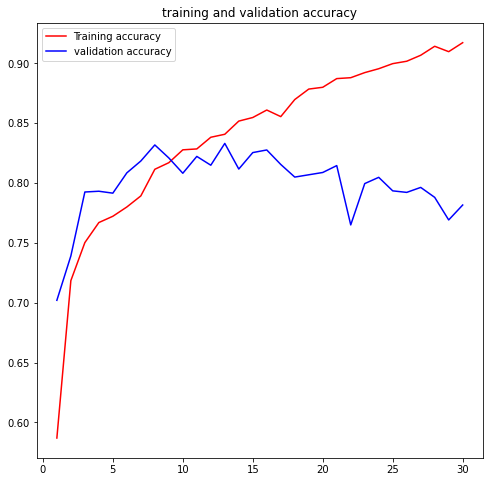

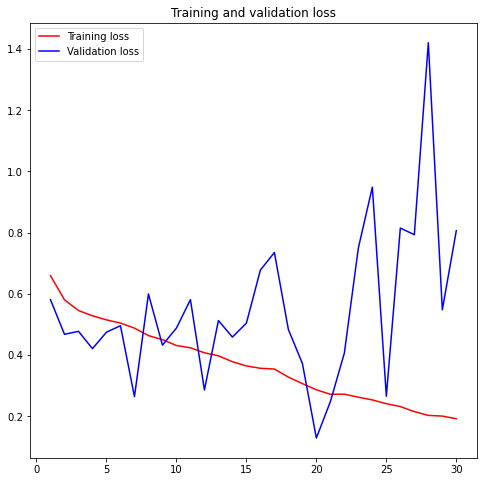

In [152]:
#visualizing the model 2
#display curves of loss and accuracy during training

import matplotlib.pyplot as plt
import numpy as np

accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(accuracy) + 1)
#x = range(1, 20, 4 )
#y = np.arange(0.71, 1.0)


plt.figure(figsize=(8.0, 8.0))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label = 'validation accuracy')
#plt.yticks(y)
#plt.xticks(x)
plt.title('training and validation accuracy')
plt.legend()

plt.figure(figsize=(8.0, 8.0))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()